# Principe

À partir de deux listes triées, on peut facilement construire une 
liste triée comportant les éléments issus de ces deux listes 
(leur fusion). Le principe de l'algorithme de tri fusion repose 
sur cette observation : le plus petit élément de la liste à 
construire est soit le plus petit élément de la première liste, 
soit le plus petit élément de la deuxième liste. Ainsi, on peut 
construire la liste élément par élément en retirant tantôt le premier 
élément de la première liste, tantôt le premier élément de la deuxième 
liste (en fait, le plus petit des deux, à supposer qu'aucune des deux 
listes ne soit vide, sinon la réponse est immédiate).

Ce procédé est appelé fusion et est au cœur de l'algorithme de tri 
développé ci-après de façon récursive.

* Si le tableau n'a qu'un élément, il est déjà trié.
* Sinon, séparer le tableau en deux parties à peu près égales.
* Trier récursivement les deux parties avec l'algorithme du tri fusion.
* Fusionner les deux tableaux triés en un seul tableau trié.



In [1]:
TAB = [ 5, 4, 3, 2, 6, 7, 1 ]
print(TAB)

[5, 4, 3, 2, 6, 7, 1]


# Fusion de deux tableaux triés

In [2]:
import include.helpers as hlp

def fusion(T,premier,limite,dernier): 

    hlp.affiche_entree_fusion(T,premier, limite, dernier)

    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    
    i = premier; i1 = i2 = 0
    
    while i1 < len(T1) and i2 < len(T2):
        if T2[i2] < T1[i1]:
            T[i] = T2[i2]; i2 += 1
        else:
            T[i] = T1[i1]; i1 += 1
        i += 1

    for j in range(i1,len(T1)):
        T[i] = T1[j]; i += 1

    for j in range(i2,len(T2)):
        T[i] = T2[j]; i += 1

    hlp.affiche_sortie_fusion(T1,T2,T[premier:dernier])

In [3]:
T = [ 3, 4, 5, 1, 2, 6 ]
fusion( T, 0, 3, 6 )

[3, 4, 5, 1, 2, 6]  M(0,3,6) 
  [3, 4, 5] + [1, 2, 6] => [1, 2, 3, 4, 5, 6]


# Récursion

In [4]:
def tri_fusion_recursif(T,premier,dernier):  
    
    hlp.affiche_entree_tri_fusion(T,premier, dernier)
    
    N = dernier - premier
    if N >= 2:
            
        milieu = premier + int(N/2)
        tri_fusion_recursif(T,premier,milieu)
        tri_fusion_recursif(T,milieu,dernier)
        fusion(T,premier,milieu,dernier)
        
def tri_fusion(T):
    tri_fusion_recursif(T,0,len(T))

In [5]:
T = TAB.copy()
tri_fusion(T)

[5, 4, 3, 2, 6, 7, 1]  S(0,7)
[5, 4, 3, 2, 6, 7, 1]    S(0,3)
[5, 4, 3, 2, 6, 7, 1]      S(0,1)
[5, 4, 3, 2, 6, 7, 1]    S(1,3)
[5, 4, 3, 2, 6, 7, 1]      S(1,2)
[5, 4, 3, 2, 6, 7, 1]      S(2,3)
[5, 4, 3, 2, 6, 7, 1]    M(1,2,3) 
  [4] + [3] => [3, 4]
[5, 3, 4, 2, 6, 7, 1]    M(0,1,3) 
  [5] + [3, 4] => [3, 4, 5]
[3, 4, 5, 2, 6, 7, 1]  S(3,7)
[3, 4, 5, 2, 6, 7, 1]    S(3,5)
[3, 4, 5, 2, 6, 7, 1]      S(3,4)
[3, 4, 5, 2, 6, 7, 1]      S(4,5)
[3, 4, 5, 2, 6, 7, 1]    M(3,4,5) 
  [2] + [6] => [2, 6]
[3, 4, 5, 2, 6, 7, 1]    S(5,7)
[3, 4, 5, 2, 6, 7, 1]      S(5,6)
[3, 4, 5, 2, 6, 7, 1]      S(6,7)
[3, 4, 5, 2, 6, 7, 1]    M(5,6,7) 
  [7] + [1] => [1, 7]
[3, 4, 5, 2, 6, 1, 7]  M(3,5,7) 
  [2, 6] + [1, 7] => [1, 2, 6, 7]
[3, 4, 5, 1, 2, 6, 7]  M(0,3,7) 
  [3, 4, 5] + [1, 2, 6, 7] => [1, 2, 3, 4, 5, 6, 7]


# Complexité
Pour évaluer la complexité de cet algorithme, réécrivons le pour qu'il compte le nombre de comparaisons et d'écritures dans le tableau (il n'y a pas d'échanges dans ce tri).

In [6]:
def fusion_cnt(T,premier,limite,dernier): 
    nb_comparaisons = nb_ecritures = 0
    
    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    
    i = premier; i1 = i2 = 0
    
    while i1 < len(T1) and i2 < len(T2):
        nb_comparaisons += 1
        if T2[i2] < T1[i1]:
            T[i] = T2[i2]; i2 += 1; nb_ecritures += 1
        else:
            T[i] = T1[i1]; i1 += 1; nb_ecritures += 1
        i += 1

    for j in range(i1,len(T1)):
        T[i] = T1[j]; i += 1; nb_ecritures += 1

    for j in range(i2,len(T2)):
        T[i] = T2[j]; i += 1; nb_ecritures += 1
        
    return nb_comparaisons, nb_ecritures
        
def tri_fusion_recursif_cnt(T,premier,dernier):      
    N = dernier - premier
    if N >= 2:          
        milieu = premier + int(N/2)
        nc1, ne1 = tri_fusion_recursif_cnt(T,premier,milieu)
        nc2, ne2 = tri_fusion_recursif_cnt(T,milieu,dernier)
        nc3, ne3 = fusion_cnt(T,premier,milieu,dernier)
        return nc1 + nc2 + nc3, ne1 + ne2 + ne3 
    else:
        return 0,0
        
def tri_fusion_cnt(T):
    return tri_fusion_recursif_cnt(T,0,len(T))

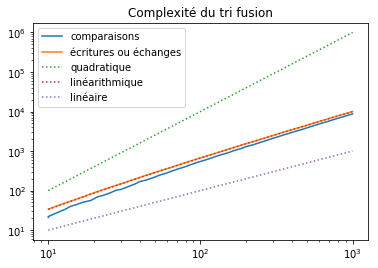

    N |     Comp. |      Ech.
-------------------------------
   10 |        21 |        34
   19 |        56 |        82
   37 |       146 |       195
   71 |       352 |       440
  138 |       813 |       986
  268 |      1824 |      2168
  517 |      4019 |      4663
 1000 |      8707 |      9976


In [7]:
hlp.evalue_complexite(tri_fusion_cnt, 
                      hlp.tableau_aleatoire, 
                      "tri fusion")

# Stabilité

Le tri fusion est stable. La ligne critique est le test `T2[i2] < T1[i1]`. En cas d'égalité entre l'élément le plus petit de T1 ou de T2, il faut d'abord copier dans T celui de T1, puisque celui-ci vient de la section `[premier:limite]` qui est antérieure à la section `[limite:dernier]`

Pour illuster cette stabilité, il faut réécrire le tri avec une fonction de comparaison générique.


Le tri est stable


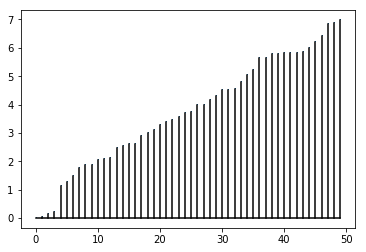

In [8]:
def fusion_generique(T,premier,limite,dernier,plus_petit):   
    T1 = T[premier:limite].copy()
    T2 = T[limite:dernier].copy()
    i = premier; i1 = i2 = 0    
    while i1 < len(T1) and i2 < len(T2):
        if plus_petit(T2[i2],T1[i1]): 
            T[i] = T2[i2]; i2 += 1
        else:                         
            T[i] = T1[i1]; i1 += 1
        i += 1

    for j in range(i1,len(T1)):
        T[i] = T1[j]; i += 1
    for j in range(i2,len(T2)):
        T[i] = T2[j]; i += 1
                
def tri_fusion_recursif_generique(T,premier,dernier,plus_petit): 
    N = dernier - premier
    if N >= 2:          
        milieu = premier + int(N/2)
        tri_fusion_recursif_generique(T,premier,milieu,plus_petit)
        tri_fusion_recursif_generique(T,milieu,dernier,plus_petit)
        fusion_generique(T,premier,milieu,dernier,plus_petit)
        
def tri_fusion_generique(T,plus_petit):
    tri_fusion_recursif_generique(T,0,len(T),plus_petit)

hlp.test_stabilite(tri_fusion_generique)

# Visualisation

Trions un tableau de 64 entiers aléatoires entre 0 et 100. Nous affichons l'état du tableau aprés les étapes de fusion qui fusionnent 16 éléments ou plus. 

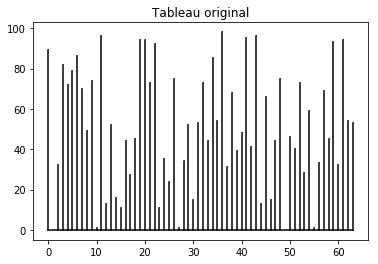

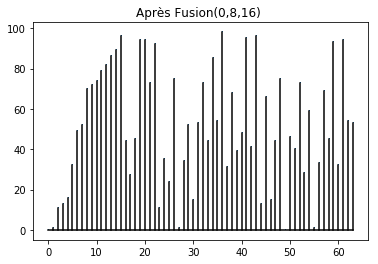

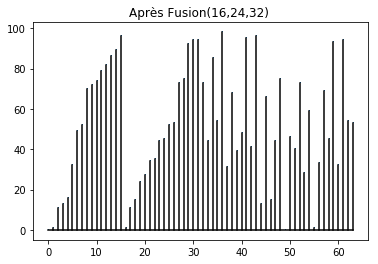

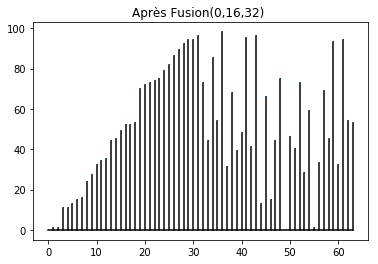

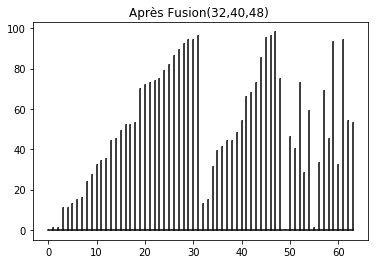

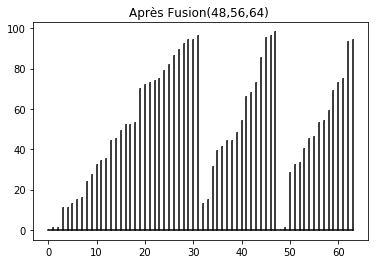

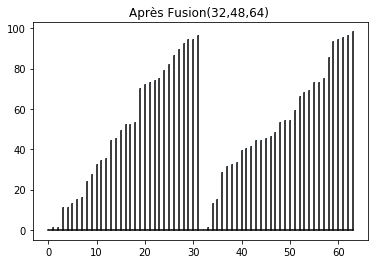

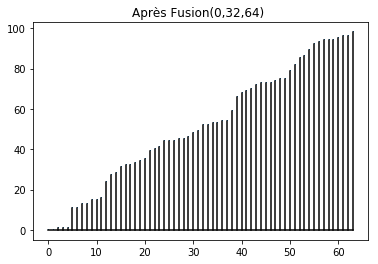

In [9]:
hlp.visualisation_tri_fusion()